# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [4]:
df = pd.read_csv('Frozen_Dessert_Production.csv', index_col='DATE', parse_dates=True)
df.head

<bound method NDFrame.head of             IPN31152N
DATE                 
1972-01-01     59.962
1972-02-01     67.061
1972-03-01     74.235
1972-04-01     78.112
1972-05-01     84.764
...               ...
2019-05-01    114.561
2019-06-01    124.960
2019-07-01    110.263
2019-08-01    102.609
2019-09-01    101.587

[573 rows x 1 columns]>

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [5]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [8]:
df.columns = ["Production"]

In [9]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [10]:
df.describe()

,Production
count,573.000
mean,109.896
std,27.951
min,58.660
25%,88.936
50%,107.643
75%,128.278
max,196.174


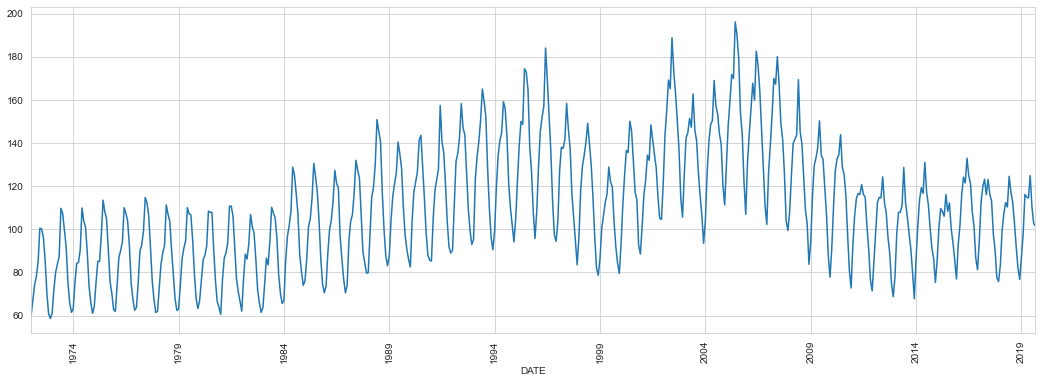

In [18]:
df['Production'].plot(figsize=(18,6))
plt.xticks(rotation=90);

<AxesSubplot:xlabel='DATE'>

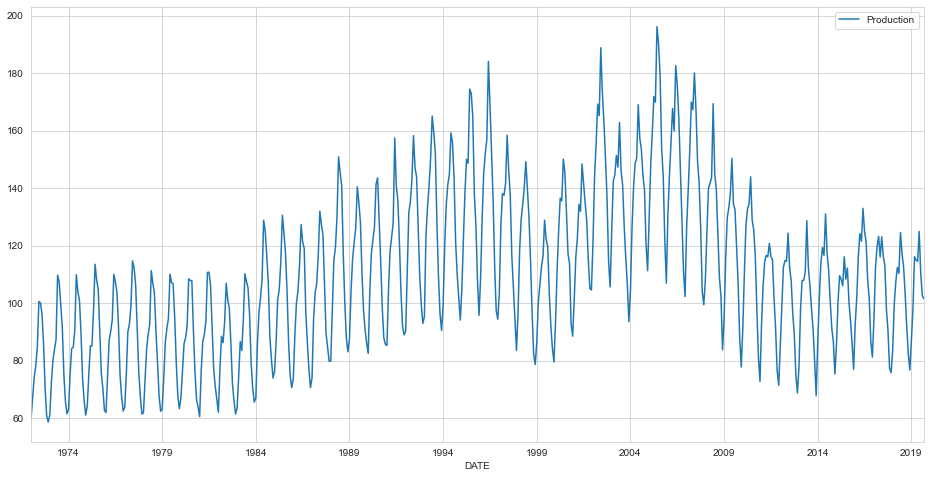

In [19]:
df.plot(figsize=(16,8))

## Preprocessing of Data

### Train Test Split

In [20]:
len(df)

573

In [21]:
test_size = 24

In [22]:
test_ind = len(df)- test_size

In [23]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [24]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2017-05-01,116.064
2017-06-01,123.087
2017-07-01,116.264


In [25]:
test

,Production
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584


### Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [29]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [31]:
len(train_scaled), len(generator), len(test_scaled), len(validation_generator)

(549, 537, 24, 12)

In [32]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [33]:
X, y = generator[0]

In [34]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


## Modelling & Model Performance

### Creating Model

In [35]:
n_features = train_scaled.shape[1]

### with "tanh" activation function

In [36]:
model = Sequential()
model.add(LSTM(48, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(24, activation = 'tanh', return_sequences=True))
model.add(LSTM(12, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 48)            9600      
_________________________________________________________________
lstm_1 (LSTM)                (None, 12, 24)            7008      
_________________________________________________________________
lstm_2 (LSTM)                (None, 12)                1776      
_________________________________________________________________
dense (Dense)                (None, 1)                 13        
Total params: 18,397
Trainable params: 18,397
Non-trainable params: 0
_________________________________________________________________


In [38]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [39]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 19s 21ms/step - loss: 0.0262 - val_loss: 0.0072
Epoch 2/20
537/537 [==============================] - 12s 22ms/step - loss: 0.0154 - val_loss: 0.0015
Epoch 3/20
537/537 [==============================] - 12s 23ms/step - loss: 0.0114 - val_loss: 0.0035
Epoch 4/20
537/537 [==============================] - 12s 23ms/step - loss: 0.0093 - val_loss: 0.0011
Epoch 5/20
537/537 [==============================] - 12s 23ms/step - loss: 0.0074 - val_loss: 0.0013
Epoch 6/20
537/537 [==============================] - 12s 22ms/step - loss: 0.0062 - val_loss: 0.0017
Epoch 7/20
537/537 [==============================] - 12s 22ms/step - loss: 0.0058 - val_loss: 0.0016
Epoch 8/20
537/537 [==============================] - 10s 19ms/step - loss: 0.0052 - val_loss: 0.0032
Epoch 9/20
537/537 [==============================] - 11s 21ms/step - loss: 0.0052 - val_loss: 0.0042


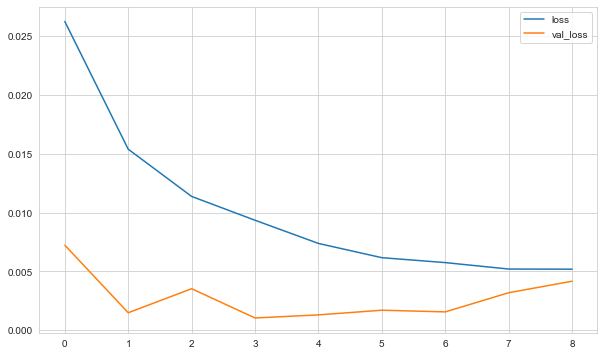

In [40]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

#### Evaluate on Test Data

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [43]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [44]:
predictions_scaled

[array([0.2506207], dtype=float32),
 array([0.20859881], dtype=float32),
 array([0.23051117], dtype=float32),
 array([0.33311874], dtype=float32),
 array([0.4383222], dtype=float32),
 array([0.47874647], dtype=float32),
 array([0.48661348], dtype=float32),
 array([0.46343324], dtype=float32),
 array([0.45963866], dtype=float32),
 array([0.39092505], dtype=float32),
 array([0.32833725], dtype=float32),
 array([0.25649858], dtype=float32)]

In [45]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.31193505329853544 
mae: 0.0822401355255415 
mse: 0.008580609416873162 
rmse: 0.09263157893976094


#### Inverse Transformations and Comparing

In [46]:
predictions = scaler.inverse_transform(predictions_scaled)

In [47]:
compare = test[:12]

In [48]:
compare['Predictions_tanh'] = predictions
compare

,Production,Predictions_tanh
DATE,,
2017-10-01,90.473,93.124
2017-11-01,77.438,87.345
2017-12-01,75.812,90.358
2018-01-01,83.434,104.468
2018-02-01,99.490,118.935
2018-03-01,107.315,124.494
2018-04-01,112.431,125.576
2018-05-01,110.354,122.388
2018-06-01,124.584,121.867


<AxesSubplot:xlabel='DATE'>

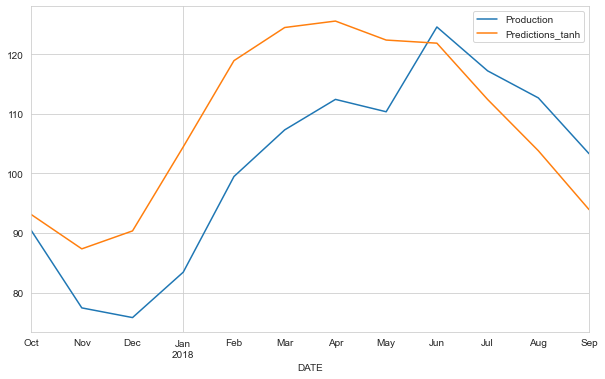

In [49]:
compare.plot()

#### Calculation R2 Score and Error Metrics

In [50]:
eval_metrics(compare.Production, compare.Predictions_tanh)

r2_score: 0.3119350532985359 
mae: 11.30916177264576 
mse: 162.2599478251137 
rmse: 12.73812968316439


### with "relu" activation function

In [51]:
model = Sequential()
model.add(LSTM(48, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(24, activation = 'relu', return_sequences=True))
model.add(LSTM(12, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 12, 48)            9600      
_________________________________________________________________
lstm_4 (LSTM)                (None, 12, 24)            7008      
_________________________________________________________________
lstm_5 (LSTM)                (None, 12)                1776      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 18,397
Trainable params: 18,397
Non-trainable params: 0
_________________________________________________________________


In [53]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [54]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 16s 19ms/step - loss: 0.0334 - val_loss: 0.0085
Epoch 2/20
537/537 [==============================] - 10s 19ms/step - loss: 0.0156 - val_loss: 0.0017oss
Epoch 3/20
537/537 [==============================] - 10s 18ms/step - loss: 0.0096 - val_loss: 0.0020
Epoch 4/20
537/537 [==============================] - 10s 19ms/step - loss: 0.0076 - val_loss: 0.0039
Epoch 5/20
537/537 [==============================] - 10s 18ms/step - loss: 0.0077 - val_loss: 0.0029
Epoch 6/20
537/537 [==============================] - 11s 20ms/step - loss: 0.0065 - val_loss: 0.0020
Epoch 7/20
537/537 [==============================] - 9s 17ms/step - loss: 0.0061 - val_loss: 0.0030


<AxesSubplot:>

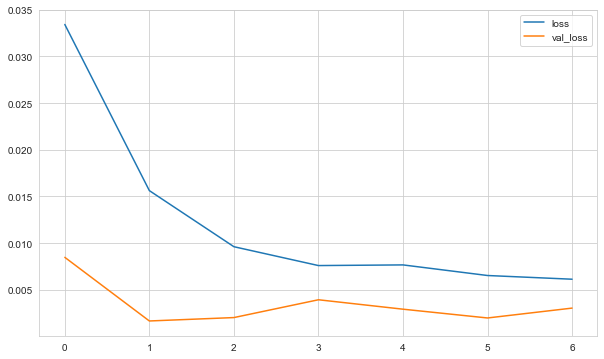

In [55]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [56]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [57]:
predictions_scaled

[array([0.2778618], dtype=float32),
 array([0.23320173], dtype=float32),
 array([0.2731085], dtype=float32),
 array([0.35022384], dtype=float32),
 array([0.4209341], dtype=float32),
 array([0.43887466], dtype=float32),
 array([0.44389328], dtype=float32),
 array([0.43738452], dtype=float32),
 array([0.43649784], dtype=float32),
 array([0.40566462], dtype=float32),
 array([0.3446487], dtype=float32),
 array([0.28339598], dtype=float32)]

In [58]:
test_scaled[:length]

array([[0.23134679],
       [0.13655347],
       [0.12472921],
       [0.18015997],
       [0.29691617],
       [0.35382169],
       [0.39102302],
       [0.37592272],
       [0.47940099],
       [0.42586022],
       [0.3928192 ],
       [0.32470899]])

In [59]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.3457589099369047 
mae: 0.0781326416183283 
mse: 0.00815880431812849 
rmse: 0.09032609987223233


#### Inverse Transformations and Comparing

In [60]:
predictions = scaler.inverse_transform(predictions_scaled)

In [61]:
compare['Predictions_relu'] = predictions
compare

,Production,Predictions_tanh,Predictions_relu
DATE,,,
2017-10-01,90.473,93.124,96.870
2017-11-01,77.438,87.345,90.728
2017-12-01,75.812,90.358,96.216
2018-01-01,83.434,104.468,106.820
2018-02-01,99.490,118.935,116.544
2018-03-01,107.315,124.494,119.011
2018-04-01,112.431,125.576,119.701
2018-05-01,110.354,122.388,118.806
2018-06-01,124.584,121.867,118.684


<AxesSubplot:xlabel='DATE'>

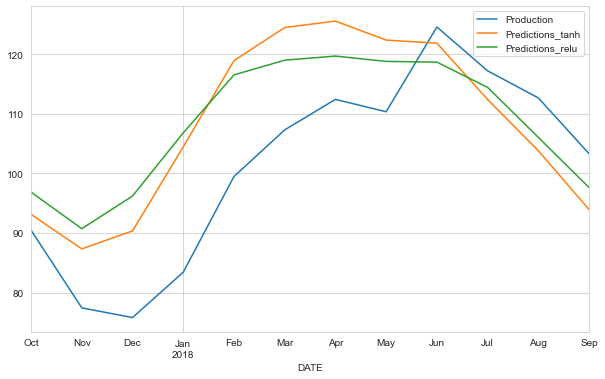

In [62]:
compare.plot()

#### Calculation R2 Score and Error Metrics

In [63]:
eval_metrics(compare.Production, compare.Predictions_relu)

r2_score: 0.3457589099369053 
mae: 10.744324266238635 
mse: 154.2835827454853 
rmse: 12.421094265220166


## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [64]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [65]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [66]:
len(df)

573

In [67]:
len(generator)

561

In [68]:
model = Sequential()

model.add(LSTM(48, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(24, activation = 'relu', return_sequences=True))
model.add(LSTM(12, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=10)

Epoch 1/10
561/561 [==============================] - 14s 18ms/step - loss: 0.0279
Epoch 2/10
561/561 [==============================] - 10s 18ms/step - loss: 0.0121
Epoch 3/10
561/561 [==============================] - 10s 18ms/step - loss: 0.0084 0s - l
Epoch 4/10
561/561 [==============================] - 9s 17ms/step - loss: 0.0072
Epoch 5/10
561/561 [==============================] - 10s 17ms/step - loss: 0.0075
Epoch 6/10
561/561 [==============================] - 9s 16ms/step - loss: 0.0068
Epoch 7/10
561/561 [==============================] - 9s 17ms/step - loss: 0.0070: 0s - loss: 0.
Epoch 8/10
561/561 [==============================] - 10s 17ms/step - loss: 0.0059
Epoch 9/10
561/561 [==============================] - 9s 15ms/step - loss: 0.0063
Epoch 10/10
561/561 [==============================] - 9s 16ms/step - loss: 0.0066


In [69]:
scaled_full_data.shape

(573, 1)

In [70]:
scaled_full_data[-length:].shape

(12, 1)

In [71]:
forecast = []
# Replace periods with whatever forecast length you want

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [72]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[ 87.81035104],
       [ 80.73236559],
       [ 81.03056946],
       [ 89.37136821],
       [ 99.93163503],
       [110.85680036],
       [112.02897713],
       [117.3079323 ],
       [119.94346943],
       [110.73227964],
       [105.48141786],
       [ 99.7321699 ]])

In [73]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [74]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [75]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [76]:
forecast_df

,Forecast
2019-10-01,87.810
2019-11-01,80.732
2019-12-01,81.031
2020-01-01,89.371
2020-02-01,99.932
2020-03-01,110.857
2020-04-01,112.029
2020-05-01,117.308
2020-06-01,119.943
2020-07-01,110.732


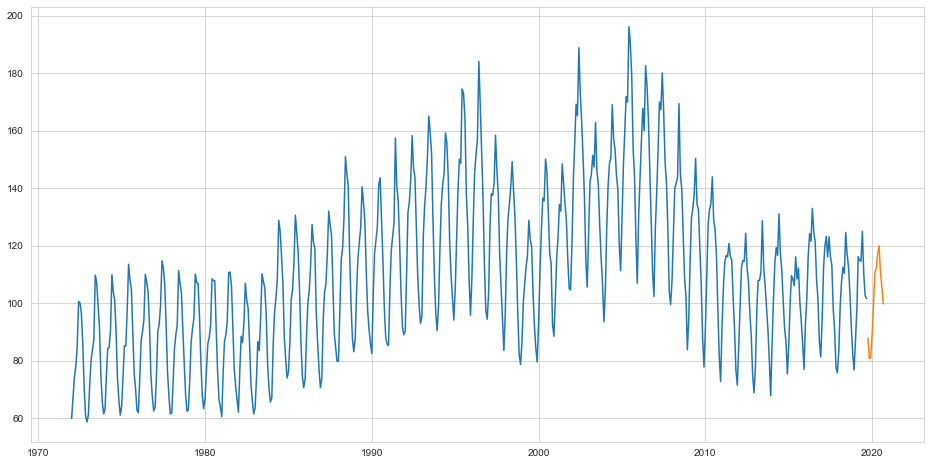

In [78]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

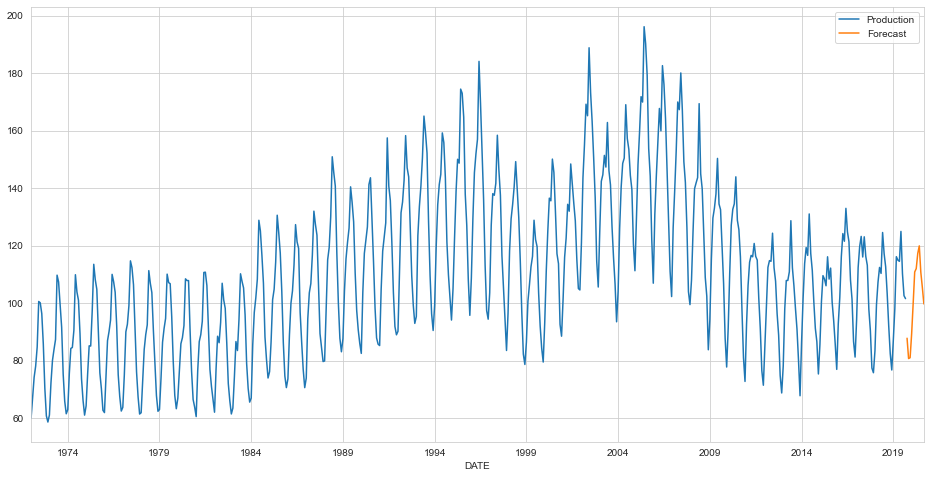

In [79]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 611.0)

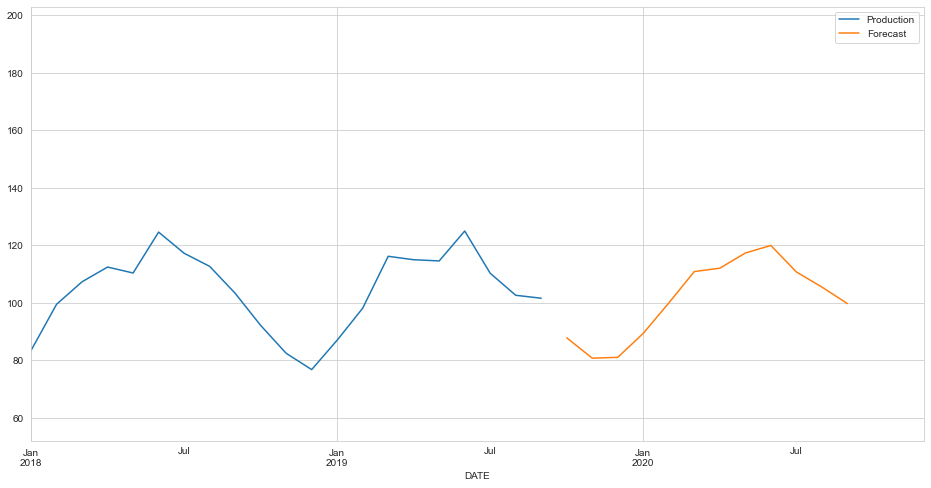

In [80]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')